In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate,KFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [192]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [193]:
set_train = pd.read_csv('data_set.csv')
test_values = pd.read_csv('data_test.csv', index_col='building_id')

In [194]:
columnas_seleccionadas = ['age',
                         'geo_level_1_id',
                         'area_percentage',
                         'count_floors_pre_eq',
                         'geo_level_2_id',
                         'height_percentage',
                         'resistance',
                         'roof_type',
                         'ground_floor_type',
                         'other_floor_type',
                         'position_j', 'position_o', 
                         'position_s', 'position_t',
                         'base_condition']

In [195]:
train, test = train_test_split(set_train, test_size = 0.20, shuffle = False)

In [196]:
train_values_subset = train.iloc[:, 0:-1]
train_labels = train.loc[:, 'damage_grade']

In [197]:
test_values_subset = test.iloc[:, 0:-1]
test_labels = test.loc[:, 'damage_grade']

In [198]:
# A parameter grid for XGBoost
#n_jobs=[-1]
#n_estimators=np.arange(100,1000,100)
#learning_rate=[0.03,0.01,0.1]
#max_depth=np.arange(10,100,15)
# Param grid for Xgboost
#param_grid={'n_jobs':n_jobs,
 #           'n_estimators':n_estimators,
  #          'max_depth':max_depth,
   #         'learning_rate':learning_rate
    #       }

In [199]:
#rf=XGBClassifier()
#kf=KFold(n_splits=2,shuffle=True)

In [200]:
#rs=RandomizedSearchCV(rf,param_distributions=param_grid,cv=kf,scoring='f1_micro')

In [201]:
#random_search = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=500, scoring='accuracy', n_jobs=1, cv=skf.split(train_values_subset,train_labels.values.ravel()), random_state=1)

In [202]:
train_values_subset = pd.get_dummies(train_values_subset)

In [203]:
# *----- Submit 0.7257
rf_model = XGBClassifier(n_jobs=-1,n_estimators= 600, max_depth= 10,learning_rate= 0.1, eval_metric='mlogloss')

In [204]:
start_time = timer(None)
rf_model.fit(train_values_subset, train_labels.values.ravel())
timer(start_time) 


 Time taken: 0 hours 5 minutes and 14.72 seconds.


In [205]:
# *----- Submit actual 0.7257
preds = rf_model.predict(test_values_subset)
f1_score(test_labels, preds, average='micro')

0.7332284310715382

In [206]:
#rs.best_params_ 0.7332284310715382
#rs.best_params_ 

In [207]:
test_values_subset = test_values[columnas_seleccionadas]
test_values_subset = pd.get_dummies(test_values_subset)
test_values_subset

,age,geo_level_1_id,area_percentage,count_floors_pre_eq,geo_level_2_id,height_percentage,resistance,roof_type,ground_floor_type,other_floor_type,position_j,position_o,position_s,position_t,base_condition
building_id,,,,,,,,,,,,,,,
300051,20,17,7,3,596,6,0.50,0.703746,0.805498,0.633191,0,0,1,0,1.673320
99355,25,6,13,2,141,5,0.50,0.703746,0.805498,0.633191,0,0,1,0,1.673320
890251,5,22,4,2,19,5,0.50,0.703746,0.805498,0.633191,0,0,1,0,1.673320
745817,0,26,19,1,39,3,0.85,0.062232,0.093682,0.150447,0,0,0,1,1.673320
421793,15,17,8,3,289,7,0.50,0.234022,0.805498,0.633191,0,0,0,1,1.673320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,70,4,20,3,605,6,0.80,0.234022,0.805498,0.633191,0,0,0,1,1.673320
663567,25,10,6,3,1407,7,1.10,0.703746,0.805498,0.633191,0,0,1,0,0.979221
1049160,50,22,3,1,1136,3,0.80,0.703746,0.805498,0.150447,0,0,1,0,1.673320


In [208]:
predictions = rf_model.predict(test_values_subset)

In [209]:
submission_format = pd.read_csv('submission_format.csv',index_col='building_id')

In [210]:
my_submission = pd.DataFrame(data=predictions, columns=submission_format.columns,
                            index=submission_format.index)

In [211]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,2
421793,3


In [212]:
my_submission.to_csv('submision.csv')

In [213]:
!head submision.csv

"head" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [214]:
# Gini importance
rf_model.feature_importances_
columnas_seleccionadas = ['age',
                         'geo_level_1_id',
                         'area_percentage',
                         'count_floors_pre_eq',
                         'geo_level_2_id',
                         'height_percentage',
                         'resistance',
                         'roof_type',
                         'ground_floor_type',
                         'other_floor_type',
                         'position_j', 'position_o', 
                         'position_s', 'position_t',
                         'base_condition']

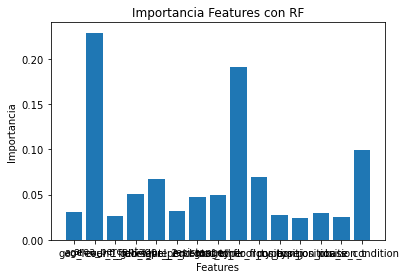

In [215]:
plt.bar(test_values_subset.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()